In [148]:
import altair as alt 
import pandas as pd

alt.renderers.enable('notebook')

url = "https://www.bmi.bund.de/SharedDocs/downloads/DE/veroeffentlichungen/themen/moderne-verwaltung/ifg/ifg-statistik-2018-maschinenlesbar.csv;jsessionid=54E3EDDA47AAACAB9B04EDFFBB7230EB.2_cid364?__blob=publicationFile&v=2"

ifgdata = pd.read_csv(url, sep=";", encoding = "ISO-8859-1")

ifgdata = ifgdata.set_index('Unnamed: 0')
ifgdata = ifgdata.astype("float64", errors='ignore')

ifgdata_tr = ifgdata.T

ifgdata

,Eingang Anträge in 2018,Erledigungen und Bescheide in 2018,Informationszugang gewährt,Informationszugang teilweise gewährt,Informationszugang abgelehnt,sonstige Erledigung,Gebühr erhoben,Höhe der Gebühr bis 50 ,Höhe der Gebühr bis 50 - 100 ,Höhe der Gebühr bis > 100 ,...,Teilweise Abhilfe,Zurückweisung,sonstige Erledigung .1,Widerspruchsgebühren erhoben,Eingang Klagen in 2018,Klageerledigungen in 2018,Stattgabe,Teilweise Stattgabe,Abweisung,sonstige Erledigung .2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
BK Amt,154.0,161.0,12.0,17.0,54.0,78.0,15.0,9.0,2.0,4.0,...,2.0,13.0,1.0,12.0,5.0,3.0,0.0,1.0,0.0,2.0
BK Amt GB,9.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK Amt Gesamt,163.0,170.0,12.0,17.0,63.0,78.0,15.0,9.0,2.0,4.0,...,2.0,13.0,1.0,12.0,5.0,3.0,0.0,1.0,0.0,2.0
BMAS,56.0,56.0,25.0,7.0,6.0,18.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
BMAS GB,1231.0,1226.0,1049.0,28.0,47.0,102.0,18.0,6.0,5.0,7.0,...,0.0,8.0,1.0,8.0,3.0,5.0,3.0,0.0,2.0,0.0
BMAS Gesamt,1287.0,1282.0,1074.0,35.0,53.0,120.0,20.0,6.0,6.0,8.0,...,0.0,9.0,1.0,9.0,3.0,5.0,3.0,0.0,2.0,0.0
AA,434.0,501.0,100.0,87.0,32.0,282.0,75.0,57.0,12.0,6.0,...,2.0,6.0,4.0,7.0,3.0,3.0,0.0,0.0,0.0,3.0
AA GB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA Gesamt,434.0,501.0,100.0,87.0,32.0,282.0,75.0,57.0,12.0,6.0,...,2.0,6.0,4.0,7.0,3.0,3.0,0.0,0.0,0.0,3.0


In [149]:
ifgdata.at["BK Amt","Erledigungen und Bescheide in 2018 "]

161.0

In [150]:
# clean dataframe

# average data ( /Erledigungen und Bescheide in 2018 ) --> create new column from unrotated frame
def replace(row):
    if row["Erledigungen und Bescheide in 2018 "] == 0:
        return row
    one_antrag_equals_percent = 100 / row["Erledigungen und Bescheide in 2018 "]
    print(one_antrag_equals_percent)
    
    for i, item in enumerate(row): 
        # updating the value of the row
        try:
            #print(item, one_antrag_equals_percent)
            row[i] = one_antrag_equals_percent * item
        except:
            print("exception", item, one_antrag_equals_percent)
    return row

ifgneu = ifgdata.apply(replace, axis=1)
ifgneu

0.6211180124223602
0.6211180124223602
11.11111111111111
0.5882352941176471
1.7857142857142858
0.08156606851549755
0.078003120124805
0.1996007984031936
0.1996007984031936
0.30120481927710846
0.0531632110579479
0.04518752824220515
0.5524861878453039
1.1111111111111112
0.36900369003690037
0.5
0.032658393207054215
0.030656039239730228
0.47619047619047616
0.11614401858304298
0.09337068160597572
1.3157894736842106
1.1111111111111112
0.6024096385542169
0.49019607843137253
2.857142857142857
0.41841004184100417
1.25
6.666666666666667
1.0526315789473684
0.8333333333333334
0.6578947368421053
0.36764705882352944
3.5714285714285716
0.18975332068311196
0.18018018018018017
2.127659574468085
2.7777777777777777
1.2048192771084338
1.0
1.0
3.5714285714285716
7.142857142857143
2.380952380952381
1.0309278350515463
3.3333333333333335
3.7037037037037037
0.035373187124159884
16.666666666666668
1.8867924528301887
5.882352941176471
0.4830917874396135
20.0
0.017879492222420884
0.012503125781445362
0.007357810315

,Eingang Anträge in 2018,Erledigungen und Bescheide in 2018,Informationszugang gewährt,Informationszugang teilweise gewährt,Informationszugang abgelehnt,sonstige Erledigung,Gebühr erhoben,Höhe der Gebühr bis 50 ,Höhe der Gebühr bis 50 - 100 ,Höhe der Gebühr bis > 100 ,...,Teilweise Abhilfe,Zurückweisung,sonstige Erledigung .1,Widerspruchsgebühren erhoben,Eingang Klagen in 2018,Klageerledigungen in 2018,Stattgabe,Teilweise Stattgabe,Abweisung,sonstige Erledigung .2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
BK Amt,95.652174,100.0,7.453416,10.559006,33.540373,48.447205,9.316770,5.590062,1.242236,2.484472,...,1.242236,8.074534,0.621118,7.453416,3.105590,1.863354,0.000000,0.621118,0.000000,1.242236
BK Amt GB,100.000000,100.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BK Amt Gesamt,95.882353,100.0,7.058824,10.000000,37.058824,45.882353,8.823529,5.294118,1.176471,2.352941,...,1.176471,7.647059,0.588235,7.058824,2.941176,1.764706,0.000000,0.588235,0.000000,1.176471
BMAS,100.000000,100.0,44.642857,12.500000,10.714286,32.142857,3.571429,0.000000,1.785714,1.785714,...,0.000000,1.785714,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BMAS GB,100.407830,100.0,85.562806,2.283850,3.833605,8.319739,1.468189,0.489396,0.407830,0.570962,...,0.000000,0.652529,0.081566,0.652529,0.244698,0.407830,0.244698,0.000000,0.163132,0.000000
BMAS Gesamt,100.390016,100.0,83.775351,2.730109,4.134165,9.360374,1.560062,0.468019,0.468019,0.624025,...,0.000000,0.702028,0.078003,0.702028,0.234009,0.390016,0.234009,0.000000,0.156006,0.000000
AA,86.626747,100.0,19.960080,17.365269,6.387226,56.287425,14.970060,11.377246,2.395210,1.197605,...,0.399202,1.197605,0.798403,1.397206,0.598802,0.598802,0.000000,0.000000,0.000000,0.598802
AA GB,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AA Gesamt,86.626747,100.0,19.960080,17.365269,6.387226,56.287425,14.970060,11.377246,2.395210,1.197605,...,0.399202,1.197605,0.798403,1.397206,0.598802,0.598802,0.000000,0.000000,0.000000,0.598802


In [151]:
ifgneu.T

Unnamed: 0,BK Amt,BK Amt GB,BK Amt Gesamt,BMAS,BMAS GB,BMAS Gesamt,AA,AA GB,AA Gesamt,BMI,...,BPrA,BT,BR,BBk,BVerfG,BfDI,BRH,Ressorts Gesamt,Ressort GB'e Gesamt,Ressorts und GB'e Gesamt
Eingang Anträge in 2018,95.652174,100.0,95.882353,100.000000,100.407830,100.390016,86.626747,0.0,86.626747,100.000000,...,100.000000,94.304917,100.000000,103.773585,94.117647,112.560386,100.0,95.673163,101.775444,99.264219
Erledigungen und Bescheide in 2018,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
Informationszugang gewährt,7.453416,0.0,7.058824,44.642857,85.562806,83.775351,19.960080,0.0,19.960080,38.554217,...,29.629630,2.051645,0.000000,56.603774,29.411765,43.478261,20.0,16.270338,71.967992,49.047164
Informationszugang teilweise gewährt,10.559006,0.0,10.000000,12.500000,2.283850,2.730109,17.365269,0.0,17.365269,10.542169,...,7.407407,0.707464,50.000000,11.320755,11.764706,10.628019,0.0,5.989630,4.163541,4.915017
Informationszugang abgelehnt,33.540373,100.0,37.058824,10.714286,3.833605,4.134165,6.387226,0.0,6.387226,20.180723,...,44.444444,1.521047,33.333333,7.547170,35.294118,16.425121,0.0,8.278205,5.976494,6.923700
sonstige Erledigung,48.447205,0.0,45.882353,32.142857,8.319739,9.360374,56.287425,0.0,56.287425,30.722892,...,18.518519,95.719844,16.666667,24.528302,23.529412,29.468599,80.0,69.461827,17.891973,39.114120
Gebühr erhoben,9.316770,0.0,8.823529,3.571429,1.468189,1.560062,14.970060,0.0,14.970060,3.614458,...,0.000000,0.000000,0.000000,1.886792,0.000000,0.966184,0.0,3.093152,11.652913,8.130380
Höhe der Gebühr bis 50 ,5.590062,0.0,5.294118,0.000000,0.489396,0.468019,11.377246,0.0,11.377246,0.602410,...,0.000000,0.000000,0.000000,1.886792,0.000000,0.000000,0.0,1.662793,4.826207,3.524391
Höhe der Gebühr bis 50 - 100 ,1.242236,0.0,1.176471,1.785714,0.407830,0.468019,2.395210,0.0,2.395210,0.301205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.966184,0.0,0.429108,3.388347,2.170554
Höhe der Gebühr bis > 100 ,2.484472,0.0,2.352941,1.785714,0.570962,0.624025,1.197605,0.0,1.197605,2.710843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.001252,3.438360,2.435435


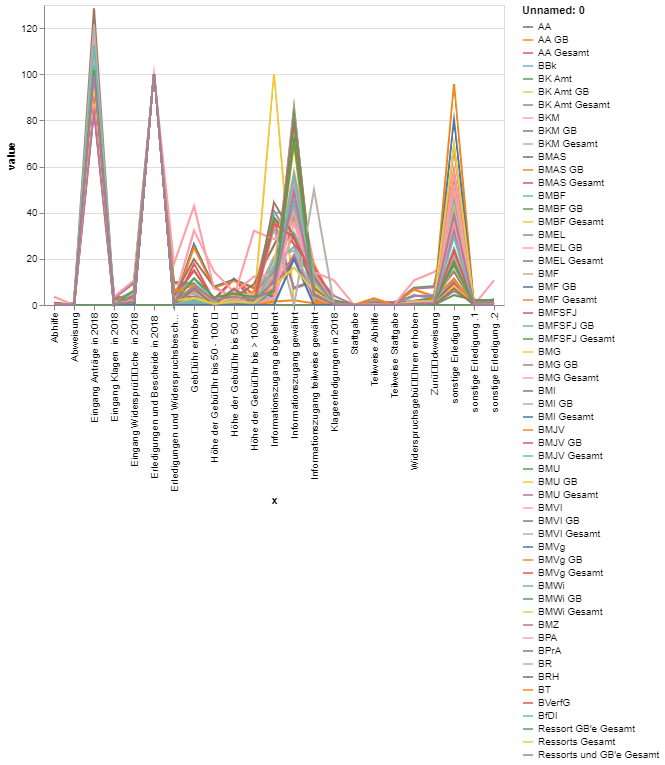

In [152]:
df = ifgneu.T
df.index.name = "x"

data = df.reset_index().melt('x')
data

alt.Chart(data).mark_line().encode(
    x='x',
    y='value',
    color='Unnamed: 0'
)

# --> This chart shows that some public bodies behave distincly different than others, especially when it comes to providing information and to "sonstige erledigung"

next step: making it interactive